In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
print(df.head())
x=df.iloc[:,[3,4]].values
x

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
from sklearn.cluster import KMeans
#-------------
# step 1: Elbow method to determine optimal k
#------------
inertia=[]
k_values=range(1,11) # choosing a guessing range
for k in k_values:
  kmeans=KMeans(n_clusters=k,init="k-means++",random_state=42)
  kmeans.fit(x)
  inertia.append(kmeans.inertia_)
inertia

[269981.28000000014,
 183653.3289473683,
 106348.37306211119,
 73880.64496247198,
 44448.45544793369,
 40825.16946386947,
 33642.57922077922,
 26686.837785187785,
 24766.471609793436,
 23103.122085983905]

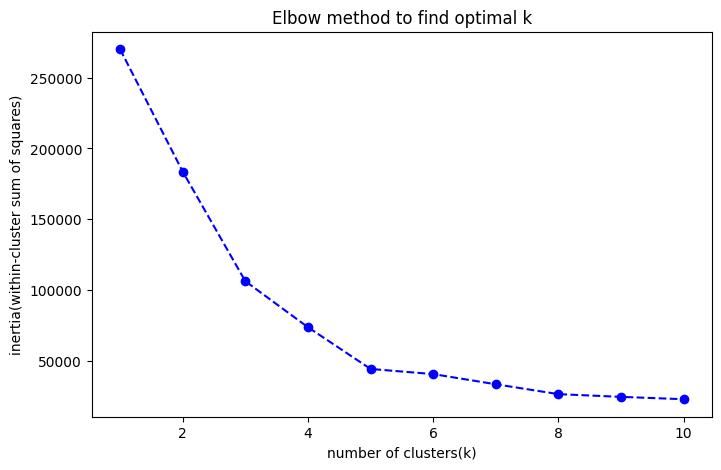

In [ ]:
#plot the elbow curve
plt.figure(figsize=(8,5))
plt.plot(k_values,inertia,marker='o',linestyle='--',color='blue')
plt.xlabel("number of clusters(k)")
plt.ylabel('inertia(within-cluster sum of squares)')
plt.title("Elbow method to find optimal k")
plt.show()

In [ ]:
#-------
# step2 :apply k-means clustering with optimal k
#-------

optimal_k=5 # from the graph we understood the preferred k is 5
kmeans=KMeans(n_clusters=optimal_k,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x) # assign clusters to data points

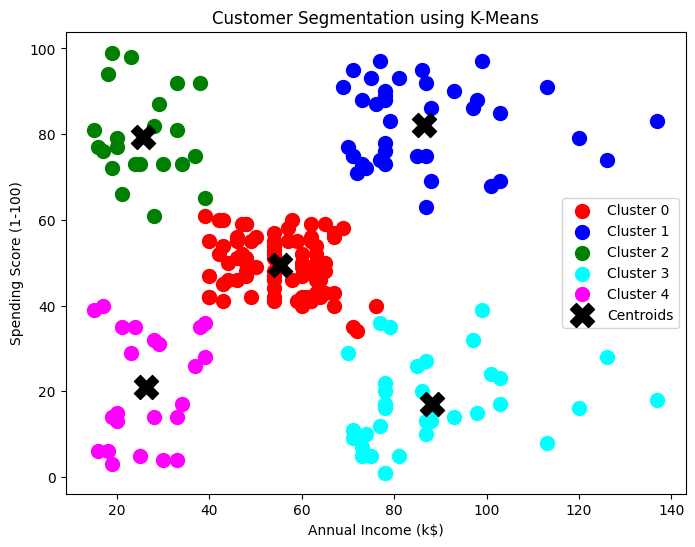

In [ ]:

# -----------------------
# Step 3: Visualizing Clusters
# -----------------------
plt.figure(figsize=(8, 6))
colors = ["red", "blue", "green", "cyan", "magenta"]
for i in range(optimal_k):
    plt.scatter(x[y_kmeans == i, 0], x[y_kmeans == i, 1],
                s=100, color=colors[i], label=f"Cluster {i}")

# Plot Centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, color="k", marker="X", label="Centroids")

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation using K-Means")
plt.legend()
plt.show()



In [ ]:
import numpy as np

# defining  a new data point

new_data=np.array([[15,39]])

#predict the cluster for the new data point
predicted_cluster=kmeans.predict(new_data)

print(f'The new data point {new_data[0]} belongs to the cluster {predicted_cluster[0]}')

The new data point [15 39] belongs to the cluster 4


In [ ]:
print(f'Inertia:{kmeans.inertia_}')

Inertia:44448.45544793369


In [ ]:
from sklearn.metrics import silhouette_score

sil_score=silhouette_score(x,kmeans.labels_)
print(f'silhouette score:{sil_score:.2f}')

silhouette score:0.55


In [ ]:
from sklearn.metrics import davies_bouldin_score

db_score=davies_bouldin_score(x,kmeans.labels_)
print(f"Davies-Bouldin  Index:{db_score:.2f}")

Davies-Bouldin  Index:0.57
